In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [16]:
df=pd.read_csv('creditcard.csv')

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [18]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.isna().values.any()

False

In [22]:
df['Amount'].describe()

count    11664.000000
mean        62.795132
std        179.816783
min          0.000000
25%          5.000000
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [29]:
nfr = len(df[df.Class == 0])
fr = len(df[df.Class == 1])
fr_percentage = (fr/(nfr+fr))*100
print('No. of Non Fraudulent Transaction :',nfr)
print('No. of Fraudulent Transaction :',fr)
print(f'Percentage of Fraudulent transaction {fr_percentage.__round__(5)} %')

No. of Non Fraudulent Transaction : 11615
No. of Fraudulent Transaction : 49
Percentage of Fraudulent transaction 0.4201 %


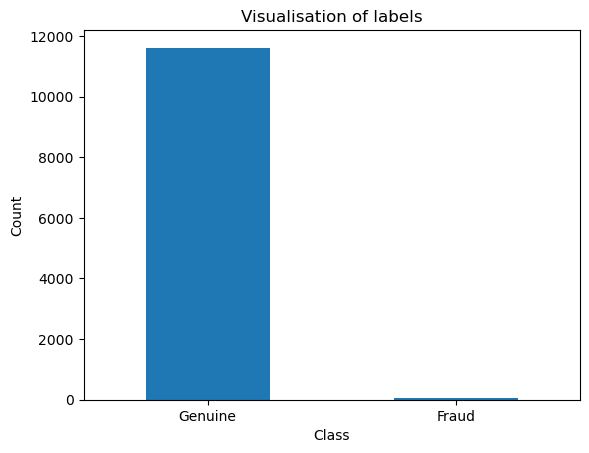

In [31]:
labels = ['Genuine','Fraud']
classes_count = df.value_counts(df['Class'],sort=True)              # type:ignore
classes_count.plot(kind='bar',rot=0)
plt.title('Visualisation of labels')
plt.ylabel('Count')
plt.xticks(range(2),labels=labels)
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['Normalized_Amount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))

In [33]:
df.drop(['Amount','Time'],inplace=True,axis=1)

In [34]:
X=df.iloc[:,:-1]
Y=df['Class']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rf = RandomForestClassifier(n_estimators=100)
dt = DecisionTreeClassifier()

In [38]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [39]:
y_pred = dt.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

1.0

In [43]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [44]:
y_pred2 = rf.predict(X_test)

In [45]:
accuracy_score(Y_test,y_pred2)

1.0

In [46]:
y_pred[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [47]:
y_pred2[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [52]:
from sklearn.metrics import precision_score,confusion_matrix,recall_score,f1_score
def metrics(actuals,predictions):
    print(f'Accuracy :{accuracy_score(actuals,predictions).__round__(5)}')
    print(f'Precision :{precision_score(actuals,predictions)}')
    print(f'Recall :{recall_score(actuals,predictions)}')
    print(f'F1_score :{f1_score(actuals,predictions)}')
    print(f'Confusion Matrix :{confusion_matrix(actuals,predictions)}')

In [53]:
metrics(Y_test,y_pred)

Accuracy :1.0
Precision :1.0
Recall :1.0
F1_score :1.0
Confusion Matrix :[[2324    0]
 [   0    9]]


In [54]:
metrics(Y_test,y_pred2)

Accuracy :1.0
Precision :1.0
Recall :1.0
F1_score :1.0
Confusion Matrix :[[2324    0]
 [   0    9]]
